# Training Models

## The normal equation

![alt text](image-1.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
m = 100
X = 2 *  np.random.rand(m, 1) # making a column vector X
y = 4 + 3 * X + np.random.rand(m, 1) # column vector  y, based on X

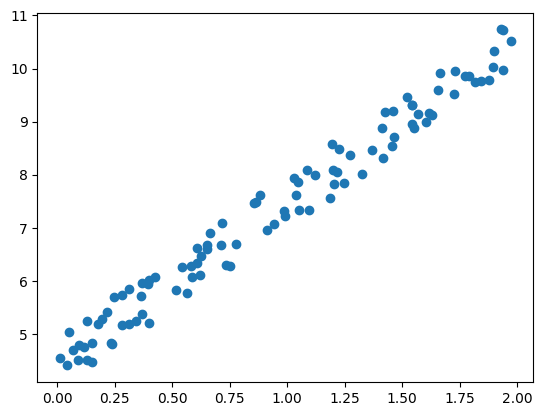

In [ ]:
# visualizando
plt.scatter(X, y)
plt.show()

In [14]:
from sklearn.preprocessing import add_dummy_feature

In [15]:
X_b = add_dummy_feature(X)

In [16]:
np.dot(np.dot(np.linalg.inv(np.dot(X_b.T, X_b)), X_b.T), y)

array([[4.51359766],
       [2.98323418]])

In [ ]:
# readable form
tetha = np.linalg.inv( X_b.T @ X_b ) @ X_b.T @ y 
tetha

array([[4.51359766],
       [2.98323418]])

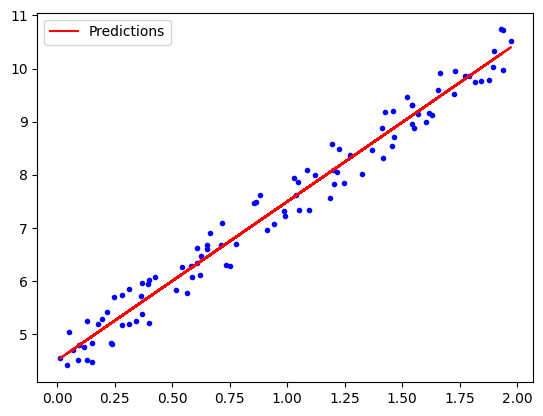

In [37]:
eq = tetha[0] + tetha[1] * X

plt.plot(X, y, 'b.')
plt.plot(X,eq, "r-", label='Predictions')
plt.legend()
plt.show()


In [39]:
len(X_b)

100

## Gradiant Descend

![alt text](image.png)

![alt text](image-2.png)

In [65]:
np.random.seed(42)


n_epochs = 1000   # number of iterations
m = len(X_b)  # elements in X_b
etha = 0.1  #learning rate

tetha = np.random.randn(2,1) # starting point

In [66]:
for epoch in range(n_epochs):
    grad = 2 / m * X_b.T @ (X_b @ tetha - y) # calculate the gradient with the current tetha value.
    tetha = tetha - etha * grad  # calculate new tetha value, using the learning rate * gradient

In [67]:
tetha

array([[4.51359766],
       [2.98323418]])

The effects of different learning rates.

![alt text](image-3.png)

## Stochastic Gradient Descent

Key points:
- Uses only 1 feature per training cycle, which speeds up the calculating of the gradient descent vector.
- Speeds up training with large datasets. 
- helps with jumping out of local minima.
- hyperparameter : learning schedule.

In [ ]:
# implementation
n_epochs = 50
t0, t1 =  5, 50 # learning schedule hyperparemeters

def learning_schedule(t):
    return t0 / (t+t1)

np.random.seed(42)
theta = np.random.randn(2,1) # tetha initialization.

for epoch in range (n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index + 1]
        yi = y[random_index: random_index + 1]
        gradients = 2 * xi.T @ ( xi @ theta - yi) # no division by m for SGD
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

In [92]:
theta

array([[4.51548062],
       [2.9775157 ]])

The result is quite good, and achieved only in 50 epochs. The graphic shows the first 20 setps of SGD.

![alt text](image-4.png)

Implementing SGD with scikit-learn

In [93]:
from sklearn.linear_model import SGDRegressor

In [ ]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, 
                       eta0= 0.01, n_iter_no_change=100, random_state=42)

In [98]:
sgd_reg.fit(X,  y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [107]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.50316965]), array([2.99156535]))

## Polynomial Regression

How do we find equations for curves (?)

In [167]:
# first, lets generate a curve
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2*X**2 + X + 5 - np.random.randn(m, 1)

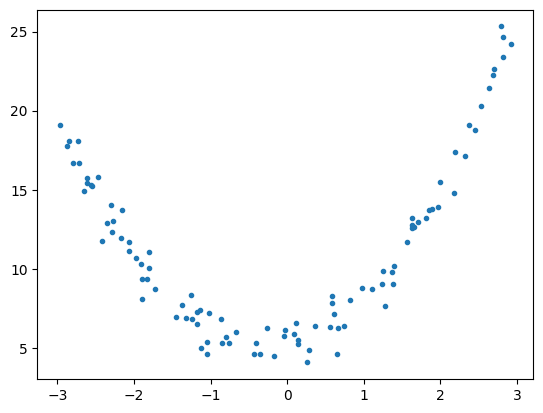

In [168]:
# visualization
plt.plot(X, y, '.')

In [133]:
from sklearn.preprocessing import PolynomialFeatures

poly_transform = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_transform.fit_transform(X)
X[0]

array([-0.75275929])

In [135]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_poly, y)

LinearRegression()

In [136]:
linear_model.intercept_

array([5.21865419])

In [137]:
linear_model.coef_

array([[1.06633107, 1.93543737]])

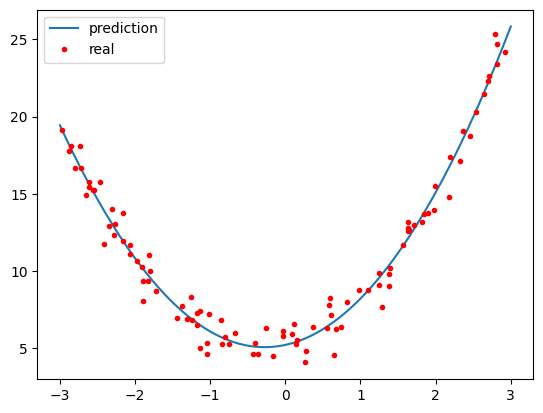

In [172]:
x_space = np.linspace(-3, 3, 100).reshape(100, 1)
y_predict = x_space * linear_model.coef_[0][0] + linear_model.coef_[0][1]* x_space **2 + linear_model.intercept_

plt.plot(x_space, y_predict, label='prediction')
plt.plot(X, y, 'r.', label='real' )
plt.legend()
plt.show()